In [1]:
import random

class Crossword:
    def __init__(self, height, width, empty_char, available_words):
        self.width = width
        self.height = height
        self.empty_char = empty_char
        self.available_words = sorted([word.lower().replace(" ", "") for word in available_words], key=lambda w: len(w), reverse=True)
        self.grid = [[empty_char for _ in range(width)] for _ in range(height)]
        self.current_word_list = []


    def reset_grid(self):
        self.grid = [[self.empty_char for _ in range(self.width)] for _ in range(self.height)]
        self.current_word_list = []

    def place_word(self, word, row, col, vertical):
        if vertical:
            for i, letter in enumerate(word):
                self.grid[row + i][col] = letter
        else:
            for i, letter in enumerate(word):
                self.grid[row][col + i] = letter
        self.current_word_list.append(word)

    def fits_in_grid(self, word, row, col, vertical):
        if vertical:
            if row < 0 or row+len(word) > self.height or col < 0 or col >= self.width:
                return False
            if row > 0 and row + len(word) <= self.height:
                if self.grid[row - 1][col] != self.empty_char:
                    return False
            ############################################################# 
            # Comment this part to speed up (Vertical)
            if row >= 0 and row + len(word) < self.height:
                if self.grid[row + len(word)][col] != self.empty_char:
                    return False
            #############################################################
            for i in range(len(word)):
                if self.grid[row + i][col] not in (self.empty_char, word[i]):
                    return False
                if self.grid[row + i][col] == self.empty_char:
                    if col in range(1, self.width - 1):
                        if self.grid[row + i][col + 1] != self.empty_char:
                            return False
                        elif self.grid[row + i][col - 1] != self.empty_char:
                            return False
                    elif col == 0:
                        if self.grid[row + i][col + 1] != self.empty_char:
                            return False
                    elif col == self.width - 1:
                        if self.grid[row + i][col - 1] != self.empty_char:
                            return False

        else:
            if col < 0 or col+len(word) > self.width or row < 0 or row >= self.height:
                return False
            
            if col > 0 and col + len(word) <= self.width:
                if self.grid[row][col - 1] != self.empty_char:
                    return False
            ############################################################# 
            # Comment this part to speed up (Horizontal)
            if col >= 0 and col + len(word) < self.width:
                if self.grid[row][col + len(word)] != self.empty_char:
                    return False
            #############################################################

            for i in range(len(word)):
                if self.grid[row][col + i] not in (self.empty_char, word[i]):
                    return False
                if self.grid[row][col + i] == self.empty_char:
                    if row in range(1, self.height - 1):
                        if self.grid[row + 1][col + i] != self.empty_char:
                            return False
                        elif self.grid[row - 1][col + i] != self.empty_char:
                            return False
                    elif row == 0:
                        if self.grid[row + 1][col + i] != self.empty_char:
                            return False
                    elif row == self.height - 1:
                        if self.grid[row - 1][col + i] != self.empty_char:
                            return False
        return True

    def find_intersection(self, word):
        intersections = []
        for i, letter in enumerate(word):
            for row in range(self.height):
                for col in range(self.width):
                    if self.grid[row][col] == letter:
                        if self.fits_in_grid(word, row - i, col, True):
                            intersections.append((row - i, col, True))
                        if self.fits_in_grid(word, row, col - i, False):
                            intersections.append((row, col - i, False))
        return intersections

    def engine(self, max_tries):
        self.reset_grid()  
        successfully_placed_all = True
        for word in self.available_words:
            placed = False
            tries = 0
            intersections = self.find_intersection(word)
            while not placed and tries < max_tries:
                if intersections:
                    row, col, vertical = random.choice(intersections)
                    if self.fits_in_grid(word, row, col, vertical):
                        self.place_word(word, row, col, vertical)
                        placed = True
                    intersections.remove((row, col, vertical))
                else:
                    vertical = random.choice([True, False])
                    if vertical:
                        max_row = self.height - len(word)
                        row = random.randint(0, max_row) if max_row >= 0 else random.randint(0, self.height - 1)
                        col = random.randint(0, self.width - 1)
                    else:
                        max_col = self.width - len(word)
                        row = random.randint(0, self.height - 1)
                        col = random.randint(0, max_col) if max_col >= 0 else random.randint(0, self.width - 1)
                    if self.fits_in_grid(word, row, col, vertical):
                        self.place_word(word, row, col, vertical)
                        placed = True
                tries += 1
            if not placed:
                successfully_placed_all = False
        return successfully_placed_all

    def solution(self):
        for row in self.grid:
            print(' '.join(row))



def create_puzzle(trials=100):
    words = input("Words: ").split(",")
    nrows = int(input("Num. Rows: "))
    ncols = int(input("Num. Cols: "))
    nwords = len(words)
    layout = Crossword(nrows, ncols, '*', words)
    while True:
        success = layout.engine(trials)
        if success:
            break
    import matplotlib.pyplot as plt
    import numpy as np
    crossword = layout.grid
    _, ax = plt.subplots(figsize=(12, 8))
    ax.set_xticks(np.arange(ncols + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(nrows + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)
    for row in range(nrows):
        for col in range(ncols):
            char = crossword[row][col]
            if char != '*':
                ax.text(col, row, char.upper(), ha='center', va='center', fontsize=16, color='black')
    background = np.array([[0 if char == '*' else 1 for char in row] for row in crossword])
    ax.imshow(background, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Crossword Puzzle (with {nwords} words)', fontsize=18, pad=20, fontweight='bold')
    plt.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.set_xticks(np.arange(ncols))
    ax.set_yticks(np.arange(nrows))
    plt.show()


### Example 1

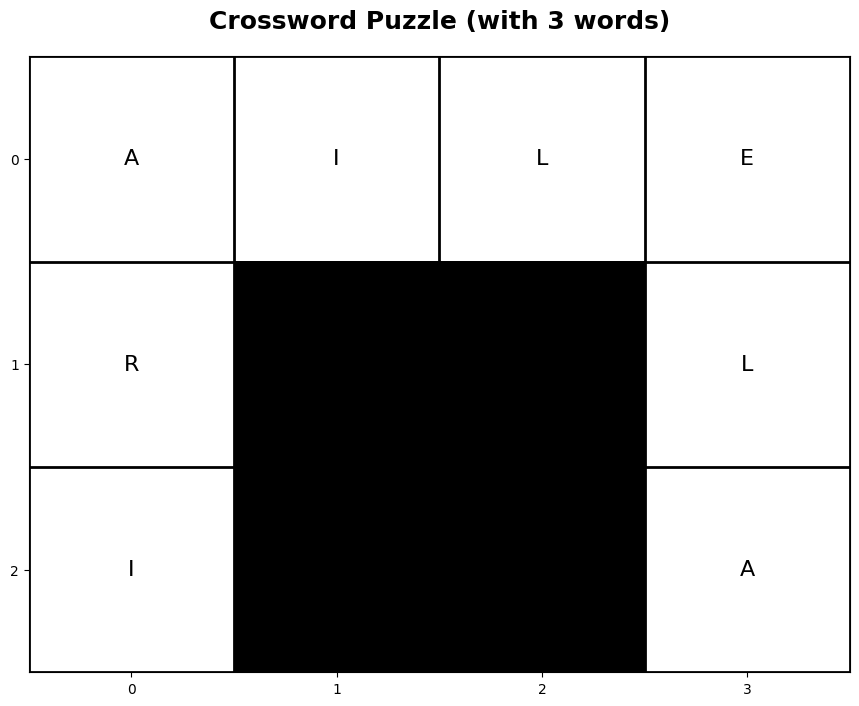

In [2]:
# - Words: aile,ela,ari
# - Num. Rows: 3
# - Num. Cols: 4
create_puzzle()

### Example 2

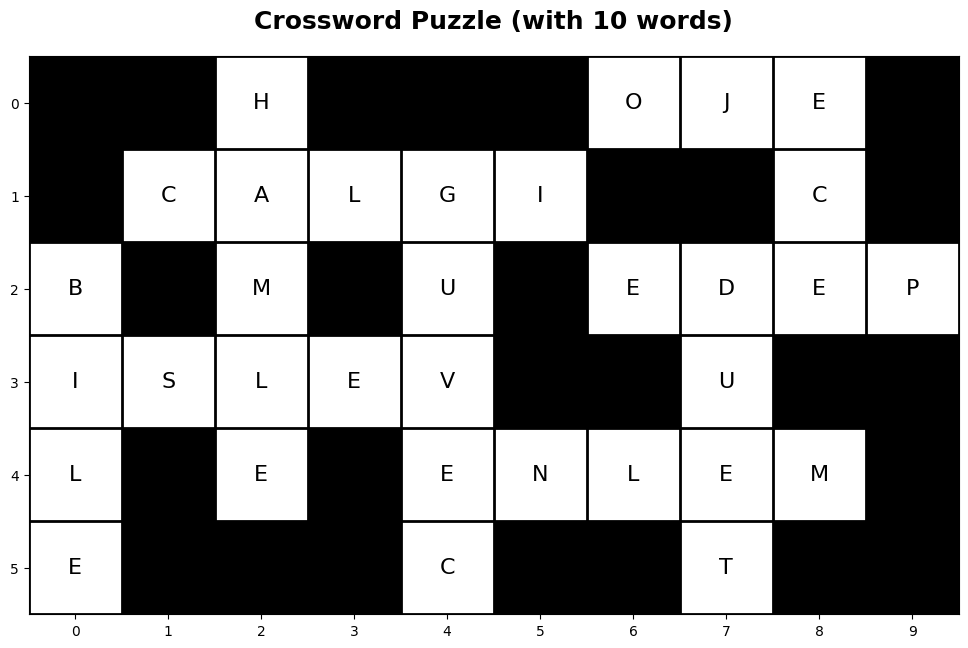

In [3]:
# - Words: islev,guvec,hamle,calgi,enlem,duet,edep,bile,ece,oje
# - Num. Rows: 6
# - Num. Cols: 10
create_puzzle()

### Example 3

###### NOT: This example may take longer since we are searching in a wider space.

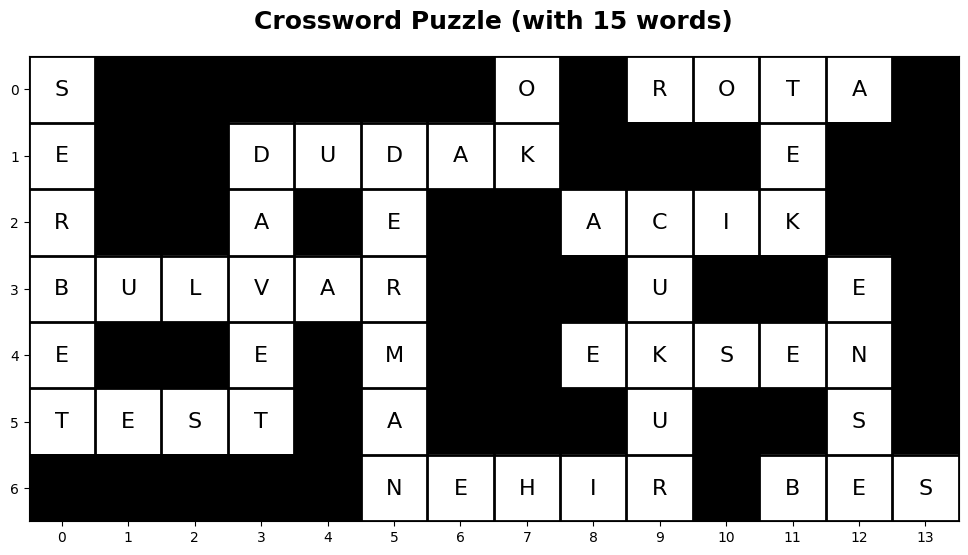

In [5]:
# - Words: bulvar,serbet,derman,davet,dudak,nehir,cukur,eksen,test,acik,ense,tek,bes,ok,rota
# - Num. Rows: 7
# - Num. Cols: 14
create_puzzle()